# Library case

## Data import

In [131]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('library.csv',index_col=0)

In [133]:
df.shape

(10427, 14)

In [134]:
df.sample(10)

,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
4982,2011-08-22,20,0,1,1,fall,Clear,27.06,31.060,34,13.0,2.67,21.14,268
2259,2011-10-12,14,0,3,1,winter,LightRain,22.14,25.760,94,19.0,3.00,18.86,78
776,2012-12-18,19,0,2,1,winter,Clear,15.58,19.695,46,26.0,2.33,28.00,353
4324,2011-10-15,14,0,6,0,winter,Clear,24.60,31.060,33,31.0,2.33,2.29,472
1899,2012-12-21,5,0,5,1,spring,Cloudy,13.94,15.150,76,28.0,3.00,18.71,13
8081,2011-10-26,4,0,3,1,winter,Clear,17.22,21.210,71,17.0,2.00,6.57,5
5335,2011-06-11,22,0,6,0,summer,Clear,27.06,30.305,78,15.0,2.33,5.71,190
9517,2011-10-12,16,0,3,1,winter,Cloudy,22.96,26.515,88,15.0,1.67,10.43,55
6708,2011-02-27,16,0,0,0,spring,Clear,19.68,23.485,44,11.0,2.00,6.57,268
3589,2011-07-15,2,0,5,1,fall,Clear,24.60,28.790,78,11.0,2.67,0.14,38


In [135]:
df.isnull().sum()

dteday          0
hr              0
holiday         0
weekday         0
workingday      0
season_t        0
weather         0
temperature     0
s_temp          0
humidity        0
winds           0
n_employee      0
exp_employee    0
occupancy       0
dtype: int64

## Split categorical/continuos variables

In [136]:
df.columns

Index(['dteday', 'hr', 'holiday', 'weekday', 'workingday', 'season_t',
       'weather', 'temperature', 's_temp', 'humidity', 'winds', 'n_employee',
       'exp_employee', 'occupancy'],
      dtype='object')

In [137]:
df.dtypes

dteday           object
hr                int64
holiday           int64
weekday           int64
workingday        int64
season_t         object
weather          object
temperature     float64
s_temp          float64
humidity          int64
winds           float64
n_employee      float64
exp_employee    float64
occupancy         int64
dtype: object

In [138]:
df[['year','month','day']]=df['dteday'].str.split('-', expand=True)

In [139]:
df

,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy,year,month,day
0,2011-05-19,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6,2011,05,19
1,2012-08-19,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377,2012,08,19
2,2011-09-24,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121,2011,09,24
3,2012-11-05,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16,2012,11,05
4,2011-11-12,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64,2011,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,2012-04-20,9,0,5,1,summer,Clear,18.86,22.725,88,6.0,2.67,14.00,359,2012,04,20
10423,2012-05-18,17,0,5,1,summer,Clear,27.06,31.060,34,9.0,2.67,7.00,812,2012,05,18
10424,2011-08-17,12,0,3,1,fall,Clear,32.80,36.365,43,19.0,3.00,18.00,189,2011,08,17
10425,2011-02-08,7,0,2,1,spring,Clear,9.84,9.850,65,28.0,2.33,25.43,100,2011,02,08


In [140]:
df_categorical=df[['hr', 'holiday', 'weekday', 'workingday',
       'season_t', 'weather', 'year', 'month', 'day']]
df_categorical.head()

,hr,holiday,weekday,workingday,season_t,weather,year,month,day
0,1,0,4,1,summer,Clear,2011,05,19
1,18,0,0,0,fall,Cloudy,2012,08,19
2,8,0,6,0,winter,Cloudy,2011,09,24
3,4,0,1,1,winter,Cloudy,2012,11,05
4,0,0,6,0,winter,Clear,2011,11,12


In [141]:
df_numerical=df[['temperature', 's_temp', 'humidity', 'winds',
       'n_employee', 'exp_employee', 'occupancy']]
df_numerical.head()

,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,20.50,24.240,94,0.0,2.67,9.29,6
1,26.24,29.545,78,7.0,2.67,3.57,377
2,23.78,27.275,90,6.0,2.67,28.00,121
3,12.30,14.395,52,17.0,2.67,4.57,16
4,9.84,12.120,60,9.0,1.67,7.57,64


## Categorical data

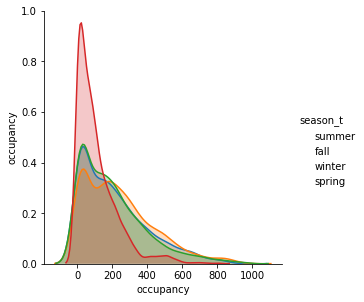

In [142]:
sns.pairplot(data=df[["season_t","occupancy"]], hue="season_t", height=4)

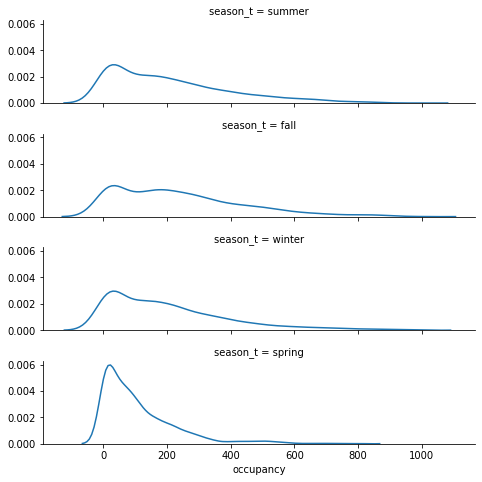

In [143]:
g = sns.FacetGrid(df, row="season_t", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "occupancy")

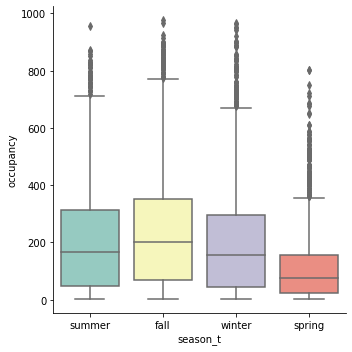

In [144]:
sns.catplot(data=df, x="season_t", y="occupancy",kind="box", palette="Set3")

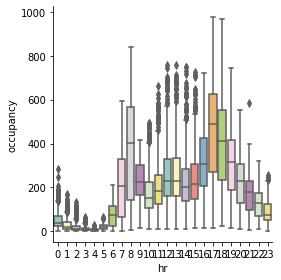

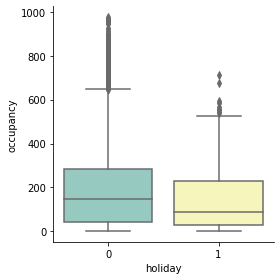

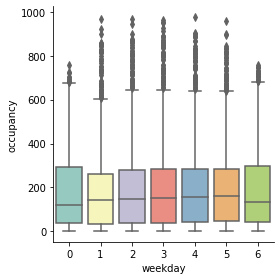

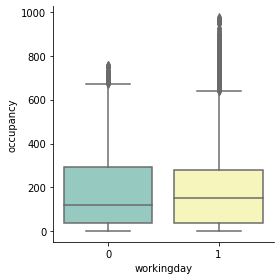

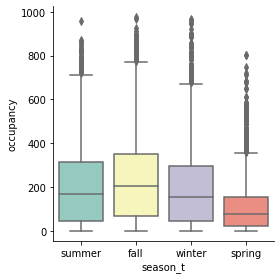

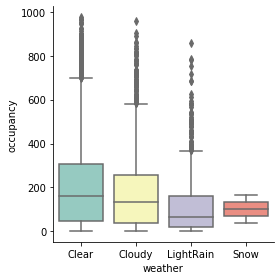

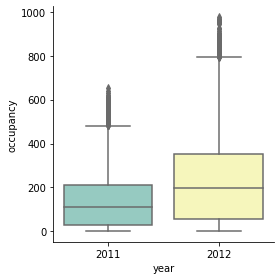

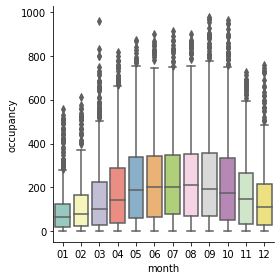

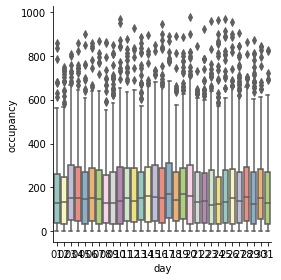

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="occupancy",
            kind="box", palette="Set3",height=4);
plt.show()



In [146]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,hr_1,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
10422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10423,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10424,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa087e5b490>,
      dtype=object)

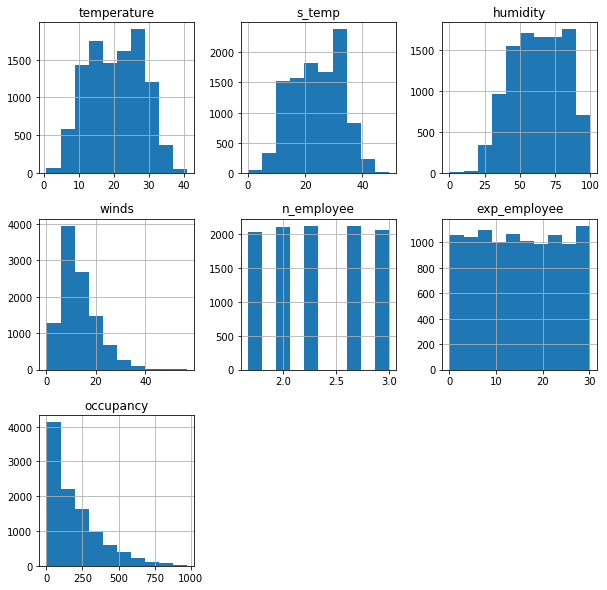

In [147]:
df_numerical.hist(figsize=(10,10))

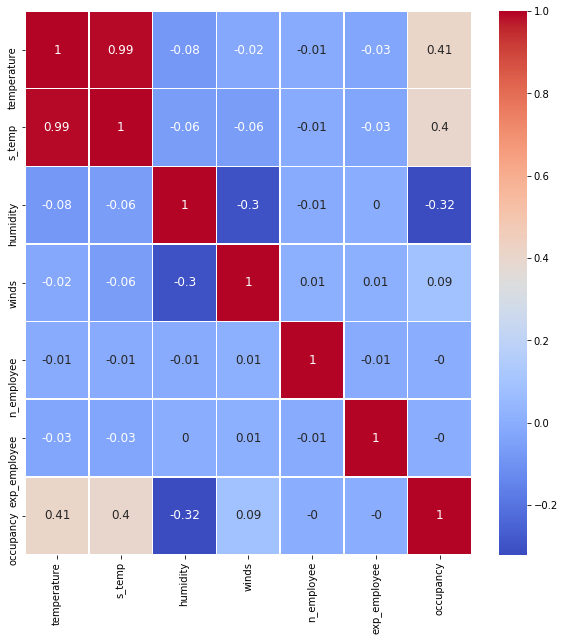

In [148]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

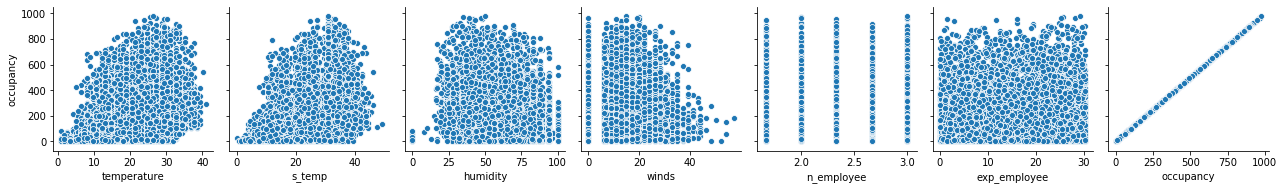

In [149]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='occupancy')

In [150]:
df_numerical=df_numerical.drop(["temperature"], axis=1)

## Standarize

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,0.045651,1.617326,-1.553917,0.713438,-0.663669,-1.013198
1,0.662326,0.790213,-0.698365,0.713438,-1.313193,1.013415
2,0.398451,1.410548,-0.820586,0.713438,1.460912,-0.385002
3,-1.098772,-0.553846,0.523853,0.713438,-1.199640,-0.958572
4,-1.363227,-0.140290,-0.453921,-1.424241,-0.858980,-0.696369


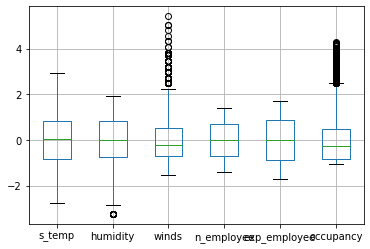

In [152]:
scaled_df.boxplot()

In [153]:
X_numerical=scaled_df.iloc[:,:-1]

In [154]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(10427, 79)
(10427, 5)


,hr_1,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
10422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10423,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10424,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [155]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,hr_1,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,...,day_27,day_28,day_29,day_30,day_31,s_temp,humidity,winds,n_employee,exp_employee
10422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.130459,1.307159,-0.820586,0.713438,-0.128833
10423,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.838435,-1.484349,-0.453921,0.713438,-0.923706
10424,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.455110,-1.019098,0.768296,1.418871,0.325380
10425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.627101,0.118183,1.868291,-0.013373,1.169080
10426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.133996,1.048686,-0.209478,-0.013373,-0.631874


### Separate Train/Test sets


In [156]:
y=df['occupancy']

In [157]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(7298, 84) (3129, 84)


## Models

In [158]:
from sklearn.model_selection import GridSearchCV

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [159]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -77.407747 using {}

MAE  train 76.341    test 75.012
MSE  train 10569.641 test 10079.614
RMSE train 102.809   test 100.397
r2   train 0.687     test 0.694


In [160]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -77.386944 using {'alpha': 0.001, 'normalize': True}

MAE  train 76.331    test 74.985
MSE  train 10570.097 test 10075.704
RMSE train 102.811   test 100.378
r2   train 0.687     test 0.694


In [161]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -77.098942 using {'alpha': 0.01, 'normalize': True}

MAE  train 76.334    test 74.731
MSE  train 10700.732 test 10112.729
RMSE train 103.444   test 100.562
r2   train 0.683     test 0.693


In [162]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -96.380080 using {'n_neighbors': 20, 'p': 1}

MAE  train 89.395    test 92.684
MSE  train 14778.512 test 15666.603
RMSE train 121.567   test 125.166
r2   train 0.562     test 0.524


In [163]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,10), 
              "min_samples_leaf": [5]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -78.327787 using {'max_depth': 9, 'min_samples_leaf': 5}

MAE  train 71.423    test 78.166
MSE  train 9506.904 test 10910.249
RMSE train 97.503   test 104.452
r2   train 0.719     test 0.668


In [164]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mse'], 
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -61.804447 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 42}

MAE  train 46.379    test 55.068
MSE  train 4774.994 test 6240.814
RMSE train 69.101   test 78.999
r2   train 0.859     test 0.810


In [165]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -73.946953 using {'C': 1000, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}

MAE  train 72.529    test 71.882
MSE  train 11452.585 test 10950.736
RMSE train 107.017   test 104.646
r2   train 0.661     test 0.667


In [166]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(100,30,4), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -144.252296 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 144.298    test 142.390
MSE  train 33775.548 test 32898.789
RMSE train 183.781   test 181.380
r2   train -0.000     test -0.000


In [167]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -101.903897 using {'learning_rate': 2, 'loss': 'square', 'n_estimators': 300, 'random_state': 0}

MAE  train 93.495    test 93.073
MSE  train 13835.939 test 14022.694
RMSE train 117.626   test 118.417
r2   train 0.590     test 0.574


In [168]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,150], "learning_rate":[0.1,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [0] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -48.052295 using {'learning_rate': 1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 150, 'random_state': 0}

MAE  train 41.577    test 46.742
MSE  train 3430.414 test 4174.826
RMSE train 58.570   test 64.613
r2   train 0.898     test 0.873


# Making the predictions

In [169]:
df2 = pd.read_csv('prediction.csv')

In [170]:
df2[['year','month','day']]=df2['dteday'].str.split('-', expand=True)

In [171]:
df2_categorical=df2[['hr', 'holiday', 'weekday', 'workingday',
       'season_t', 'weather', 'year', 'month', 'day']]
df2_numerical=df2[['temperature', 's_temp', 'humidity', 'winds',
       'n_employee', 'exp_employee', 'occupancy']]

In [172]:
dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 
df2_numerical=df2_numerical.drop(["temperature"], axis=1)

scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

X2_numerical=scaled_df2.iloc[:,:-1]
X2=pd.concat([dummies2,X2_numerical], axis = 1)

y2=df2['occupancy']

In [173]:
len(X2.columns)

84

In [174]:
len(X_train.columns)

84

In [175]:
rf = RandomForestRegressor(n_estimators=100, criterion="mse", 
              min_samples_leaf=10)

rf.fit(X_train,y_train)
# we could retrain with the entire dataset

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [176]:
y_predictions=rf.predict(X2)

In [177]:
from sklearn import metrics

print("MAE  train %.3f"  % (metrics.mean_absolute_error(y2, y_predictions)) ) 
print("MSE  train %.3f " % (metrics.mean_squared_error(y2, y_predictions)) ) 
print("RMSE train %.3f " % (np.sqrt(metrics.mean_squared_error(y2, y_predictions))) ) 
print("r2   train %.3f " % ( metrics.r2_score(y2, y_predictions)) )


MAE  train 54.563
MSE  train 6239.788 
RMSE train 78.992 
r2   train 0.805 


In [178]:
np.savetxt("model_predictions.csv", y_predictions.astype(int), delimiter=",", fmt='%.0f')